In [2]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
e_disk = np.genfromtxt("orbits_disk_e.csv", delimiter=",", dtype="float")
t = e_disk[:,101]
e_disk = np.delete(e_disk, [0,100], axis=1)
e_disk = np.delete(e_disk, [0,99], axis=1)
#######################################################################################
a_disk = np.genfromtxt("orbits_disk_a.csv", delimiter=",", dtype="float")
a_disk = np.delete(a_disk, [0,100], axis=1)
a_disk = np.delete(a_disk, [0,99], axis=1)
#######################################################################################
inc_disk = np.genfromtxt("orbits_disk_inc.csv", delimiter=",", dtype="float")
inc_disk = np.delete(inc_disk, [0,100], axis=1)
inc_disk = np.delete(inc_disk, [0,99], axis=1)
######################################################################################
omega_disk = np.genfromtxt("orbits_disk_omega.csv", delimiter=",", dtype="float")
omega_disk = np.delete(omega_disk, [0,100], axis=1)
omega_disk = np.delete(omega_disk, [0,99], axis=1)
######################################################################################
Omega_disk = np.genfromtxt("orbits_disk_Omega1.csv", delimiter=",", dtype="float")
Omega_disk = np.delete(Omega_disk, [0,100], axis=1)
Omega_disk = np.delete(Omega_disk, [0,99], axis=1)
######################################################################################
M_disk = np.genfromtxt("orbits_disk_M.csv", delimiter=",", dtype="float")
M_disk = np.delete(M_disk, [0,100], axis=1)
M_disk = np.delete(M_disk, [0,99], axis=1)

In [4]:
e_bowl = np.genfromtxt("orbits_bowl_e.csv", delimiter=",", dtype="float")
e_bowl = np.delete(e_bowl, [0,100], axis=1)
e_bowl = np.delete(e_bowl, [0,99], axis=1)
#######################################################################################
a_bowl = np.genfromtxt("orbits_bowl_a.csv", delimiter=",", dtype="float")
a_bowl = np.delete(a_bowl, [0,100], axis=1)
a_bowl = np.delete(a_bowl, [0,99], axis=1)
#######################################################################################
inc_bowl = np.genfromtxt("orbits_bowl_inc.csv", delimiter=",", dtype="float")
inc_bowl = np.delete(inc_bowl, [0,100], axis=1)
inc_bowl = np.delete(inc_bowl, [0,99], axis=1)
######################################################################################
omega_bowl = np.genfromtxt("orbits_bowl_omega.csv", delimiter=",", dtype="float")
omega_bowl = np.delete(omega_bowl, [0,100], axis=1)
omega_bowl = np.delete(omega_bowl, [0,99], axis=1)
######################################################################################
Omega_bowl = np.genfromtxt("orbits_bowl_Omega1.csv", delimiter=",", dtype="float")
Omega_bowl = np.delete(Omega_bowl, [0,100], axis=1)
Omega_bowl = np.delete(Omega_bowl, [0,99], axis=1)
######################################################################################
M_bowl = np.genfromtxt("orbits_bowl_M.csv", delimiter=",", dtype="float")
M_bowl = np.delete(M_bowl, [0,100], axis=1)
M_bowl = np.delete(M_bowl, [0,99], axis=1)

In [5]:
def Angular_Momentum(e,a,i,omega,Omega,nu,MASS_BH,MASS_STAR):
    p = (a * (1 - (e * e)))
    r = p / (1 + (e * np.cos(nu)))
    ############################################
    cO = np.cos(Omega)
    sO = np.sin(Omega)
    ci = np.cos(i)
    si = np.sin(i)
    co = np.cos(omega + nu)
    so = np.sin(omega + nu)
    sn = np.sin(nu)
    ##############################################
    x = r * ((cO * co) - (sO * so * ci))
    y = r * ((sO * co) + (cO * so * ci))
    z = r * (si * so)
    mag_r = np.sqrt(x**2 + y**2 + z**2)
    ###################################################
    mu = MASS_BH + MASS_STAR
    h = np.sqrt(mu * p)
    herp = ((h * e) / (r * p)) * sn
    hr = h / r
    #################################################
    vx = (x * herp) - (hr * ((cO * so) + (sO * co * ci)))
    vy = (y * herp) - (hr * ((sO * so) - (cO * co * ci)))
    vz = (z * herp) + (hr * si * co)
    #######################################################
    Jx = y*vz - z*vy
    Jy = z*vx - x*vz
    Jz = x*vy - y*vx
    mag = np.sqrt(Jx**2 + Jy**2 + Jz**2)
    Jx = Jx / mag
    Jy = Jy / mag
    Jz = Jz / mag
    ######################################################
    Jx_Mean = np.mean(Jx)
    Jy_Mean = np.mean(Jy)
    Jz_Mean = np.mean(Jz)
    Jx_STD = np.std(Jx)
    Jy_STD = np.std(Jy)
    Jz_STD = np.std(Jz)
    ##############################################################
    ex = (vy*Jz - vz*Jy) - x / mag_r
    ey = (vz*Jx - vx*Jz) - y / mag_r
    ez = (vx*Jy - vy*Jx) - z / mag_r
    mag_e = np.sqrt(ex**2 + ey**2 + ez**2)
    ex = ex / mag_e
    ey = ey / mag_e
    ez = ez / mag_e
    ###################################################################
    ex_Mean = np.mean(ex)
    ey_Mean = np.mean(ey)
    ez_Mean = np.mean(ez)
    ex_STD = np.std(ex)
    ey_STD = np.std(ey)
    ez_STD = np.std(ez)
    return Jx,Jy,Jz,Jx_Mean,Jy_Mean,Jz_Mean,Jx_STD,Jy_STD,Jz_STD,ex,ey,ez,ex_Mean,ey_Mean,ez_Mean,ex_STD,ey_STD,ez_STD

In [8]:
data_values = np.zeros((len(t),len(e_bowl[0])))
for n in range(len(t)):
    Jx_D,Jy_D,Jz_D,Jx_Mean_D,Jy_Mean_D,Jz_Mean_D,Jx_STD_D,Jy_STD_D,Jz_STD_D,ex_D,ey_D,ez_D,ex_Mean_D,ey_Mean_D,ez_Mean_D,ex_STD_D,ey_STD_D,ez_STD_D = Angular_Momentum(e_disk[n],a_disk[n],inc_disk[n],omega_disk[n],Omega_disk[n],M_disk[n],1,1e-4)
    Jx_B,Jy_B,Jz_B,Jx_Mean_B,Jy_Mean_B,Jz_Mean_B,Jx_STD_B,Jy_STD_B,Jz_STD_B,ex_B,ey_B,ez_B,ex_Mean_B,ey_Mean_B,ez_Mean_B,ex_STD_B,ey_STD_B,ez_STD_B = Angular_Momentum(e_bowl[n],a_bowl[n],inc_bowl[n],omega_bowl[n],Omega_bowl[n],M_bowl[n],1,.0002)
    for m in range(len(ex_B)):
        if np.abs(Jx_B[m]) <= Jx_Mean_D+Jx_STD_D and np.abs(Jy_B[m]) <= Jy_Mean_D+Jy_STD_D and np.abs(Jz_B[m]) <= Jz_Mean_D+Jy_STD_D:
            data_values[n][m] += 1
            if np.abs(ex_B[m]) <= ex_Mean_D+ex_STD_D and np.abs(ey_B[m]) <= ey_Mean_D+ey_STD_D and np.abs(ez_B[m]) <= ez_Mean_D+ez_STD_D:
                data_values[n][m] += 1

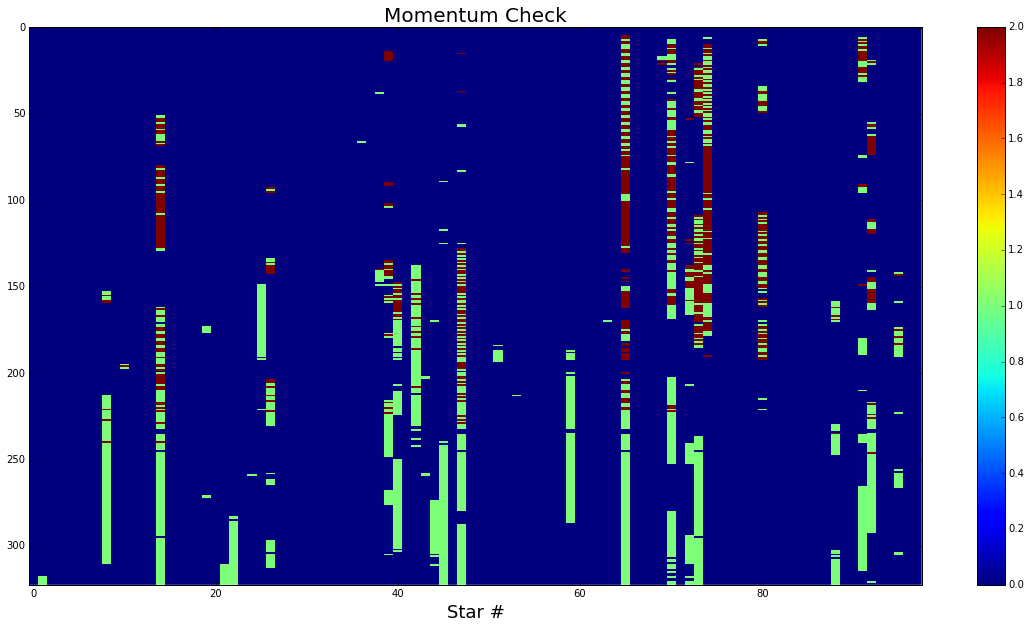

In [9]:
plt.figure(figsize=(20,10))
imgplot = plt.imshow(data_values, interpolation='none',aspect='auto')
plt.colorbar()
plt.title('Momentum Check',fontsize = 20)
plt.xlabel("Star #", fontsize = 18)
plt.savefig('AngularMomentum_1.png')